In [17]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import somoclu
import datetime
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist, cosine, euclidean, minkowski, mahalanobis 
from matplotlib import pyplot as plt
from matplotlib import ticker, style
import pickle

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

In [23]:
with open('model/distance-comp.pkl', 'rb') as fp:
    distance = pickle.load(fp).tolist()[::-1]
    
with open('model/lof-comp.pkl', 'rb') as fp:
    lof = pickle.load(fp).tolist()[::-1]
    
with open('model/rbda-comp.pkl', 'rb') as fp:
    rbda = pickle.load(fp).tolist()[::-1]

In [24]:
ens = set(distance) & set(rbda)

In [25]:
ens

{'2077630',
 '2343754',
 '3231822',
 '3564184',
 '3624800',
 '399689',
 '4077076',
 '4107404',
 '4120740',
 '4132148',
 '4166568',
 '4199908',
 '4215816',
 '4226708',
 '4226748',
 '4311328',
 '4340868',
 '4355032',
 '826073',
 '991941'}

In [26]:
len(ens)

20

In [31]:
dist_order = [distance.index(e) + 1 for index, e in enumerate(ens)]

In [32]:
rbda_order = [rbda.index(e) + 1 for index, e in enumerate(ens)]

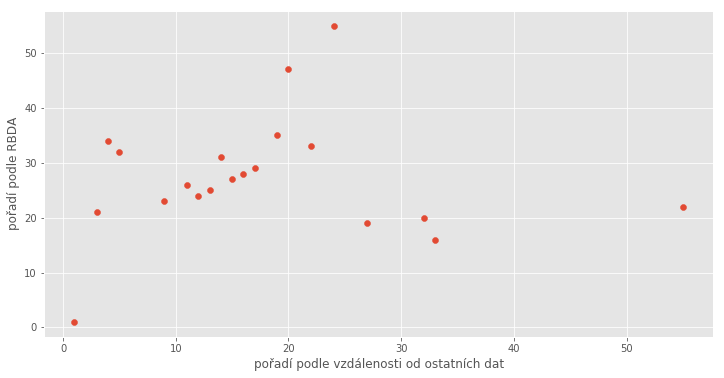

In [33]:
fig, axes = plt.subplots()
axes.set_xlabel("pořadí podle vzdálenosti od ostatních dat")
axes.set_ylabel("pořadí podle RBDA")
axes.scatter(dist_order, rbda_order)
fig.savefig("vystup/srovnani.pdf", bbox_inches='tight')

In [34]:
np.corrcoef(dist_order, rbda_order)

array([[1.        , 0.05340702],
       [0.05340702, 1.        ]])